In [17]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from skimage.transform import resize

np.set_printoptions(precision=2, suppress=True)
%matplotlib inline


In [27]:
def load_dataset(filepath='datasets/dogsvscats.h5'):
    """
    Returns:
    (X_train, Y_train), (X_test, Y_test), classes -- training and test datasets
    """

    h5file = h5py.File(filepath, "r")
    X_train = np.array(h5file["X_train"][:])
    Y_train = np.array(h5file["Y_train"][:])
    X_test = np.array(h5file["X_test"][:])
    Y_test = np.array(h5file["Y_test"][:])
    classes = np.array(h5file["Classes"][:]) 
    
    h5file.close()

    
    X_train = X_train.reshape(X_train.shape[0],-1)/255
    X_test = X_test.reshape(X_test.shape[0],-1)/255
    Y_train = Y_train.reshape(Y_train.shape[0],1)
    Y_test = Y_test.reshape(Y_test.shape[0],1) 
    
    return (X_train, Y_train), (X_test, Y_test), classes

In [28]:
# output function for neuron
def sigmoid(x):
    """
    Arguments:
    x -- numpy array of any size

    Returns:
    s -- sigmoid(x), numpy array of size of x
    """
    
    ### INPUT YOUR CODE HERE ### (1 line)
    s = 1/(1+np.exp(-x))
    ### END OF YOUR CODE SEGMENT ###  
    
    return s

In [20]:
def init_model_parameters(dim):
    """
    Initialise weights and bias to 0
    
    Argument:
    dim -- size of vector w (i.e. number of model parameters, same as number of features in training dataset)
    
    Returns:
    w -- initialised weights: column vector of shape (dim, 1)
    b -- initialised bias: scalar
    """
    
    w = np.zeros(dim).reshape(dim,1)
    b = 0
    
    return w, b

In [21]:
def forward_prop(w, b, X, Y):
    """
    Compute the logistic regression loss and its gradient

    Return:
    loss -- negative log-likelihood loss for logistic regression
    dw -- gradient of the loss with respect to w, same shape as w
    db -- gradient of the loss with respect to b, same shape as b
    """
    
    n = X.shape[0]
    
    Y_hat = sigmoid((X @ w)+b)
    loss = -1/n*(Y.T @ np.log(Y_hat) + (1-Y).T @ np.log(1-Y_hat)) # Compute cross entropy loss (scalar)
    loss = np.squeeze(loss)
    
    dw = 1/n*X.T@(Y_hat-Y)
    db = 1/n*np.sum(Y_hat-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)

    return {"dw": dw, "db": db}, loss

In [22]:
# Parameter optimisation using backprop
def model_fit(w, b, X, Y, epochs, learning_rate):
    """
    Optimise w and b by performing gradient descent
    
    Arguments:
    epochs -- number of iteration updates through dataset
    learning_rate -- learning rate of the gradient descent
    
    Returns:
    params -- dictionary with optimised weights and bias
    grads -- dictionary with final gradients
    loss_log -- list of loss values for every 100 updates
    """
    
    loss_log = []
    for i in range(epochs):
        grads, loss = forward_prop(w, b, X, Y) # Cost and gradient computation
        dw = grads["dw"] # derivative from grads
        db = grads["db"] # derivative from grads
        w = w - learning_rate*(dw) # weights update
        b = b - learning_rate*(db) # bias update 
        
        if i % 100 == 0:
            loss_log.append(loss)
            print("Loss after {} iterations: {:.3f}".format(i, loss))
        
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, loss_log

In [23]:
# Model inference
def model_predict(w, b, X):
    '''
    Predict class label using logistic regression parameters (w, b)
 
    Returns:
    Y_hat -- vector with class predictions for examples in X
    '''
    n = X.shape[0]

    A = sigmoid((X @ w) + b) # Compute Activation, shape (n, 1)
    Y_hat = (A>0.5).astype("int") # Convert activations to {0,1} predictions
    
    return Y_hat

In [24]:
# Logistic regression model
def logistic_regression_model(X_train, Y_train, X_test, Y_test, epochs=2000, learning_rate=0.5):
    '''
    Build, train and evalaute the logistic regression model
    
    Returns:
    model -- dictionary with model parameters, training logs and testing results
    '''
    
    ### INPUT YOUR CODE HERE ### (5 lines)
    dim = 12288
    w, b = init_model_parameters(dim)
    params, grads, losses = model_fit(w, b, X_train, Y_train, epochs, learning_rate)
    Y_hat_train = model_predict(params['w'], params['b'], X_train)
    Y_hat_test = model_predict(params['w'], params['b'], X_test)
    ### END OF YOUR CODE SEGMENT ###  

    print("{:.1f}% training acc.".format(100 * (1 - np.mean(np.abs(Y_hat_train - Y_train)))))
    print("{:.1f}% test acc.".format(100 * (1 - np.mean(np.abs(Y_hat_test - Y_test)))))
    
    model = {"w": params["w"], "b": params["b"], "losses": losses, "LR": learning_rate,
            "Y_hat_test": Y_hat_test, "Y_hat_train": Y_hat_train}
    
    return model

In [34]:
np.random.seed(2019)
(X_train, Y_train), (X_test, Y_test), classes = load_dataset('datasets/catsvsnoncats.h5')
model = logistic_regression_model(X_train, Y_train, X_test, Y_test, epochs=1000, learning_rate=0.005)

Loss after 0 iterations: 0.693
Loss after 100 iterations: 0.585
Loss after 200 iterations: 0.467
Loss after 300 iterations: 0.376
Loss after 400 iterations: 0.331
Loss after 500 iterations: 0.303
Loss after 600 iterations: 0.280
Loss after 700 iterations: 0.260
Loss after 800 iterations: 0.243
Loss after 900 iterations: 0.228
96.7% training acc.
72.0% test acc.


Label for 33 is 1
Predicted label is: 0


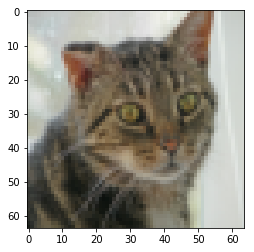

In [83]:
import random
rand = random.randint(0,Y_test.shape[0])
print("Label for {} is {}".format(rand, Y_test[rand][0]))
print("Predicted label is: {}".format(model["Y_hat_train"][rand][0]))
plt.imshow(X_test[rand].reshape(64,64,3))